### Notebook to learn and explore the Earth Movers Distance (EMD)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance 

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-1.22713708, -1.10693769, -0.9867383 , -0.86653891, -0.74633952,
        -0.62614013, -0.50594074, -0.38574135, -0.26554195, -0.14534256,
        -0.02514317,  0.09505622,  0.21525561,  0.335455  ,  0.45565439,
         0.57585378,  0.69605317,  0.81625256,  0.93645195,  1.05665135,
         1.17685074]),
 <BarContainer object of 20 artists>)

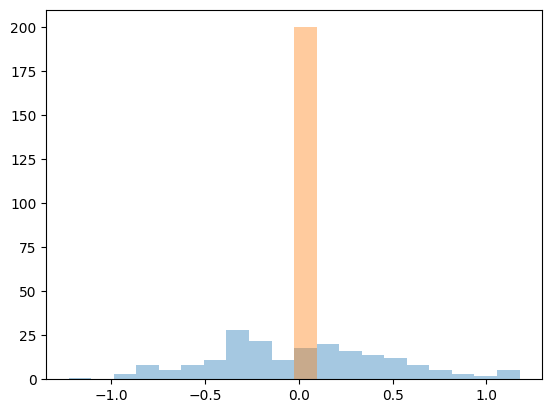

In [2]:
p = np.random.uniform(size=200)
q = np.random.normal(size=200)
p /= np.sum(p)
q /= np.sum(q)
_,bins,_ = plt.hist(q,alpha=0.4,bins=20)
plt.hist(p,alpha=0.4,bins=bins)

(array([  1.,  12.,  25.,  64.,  97., 135., 165., 185., 193., 200.]),
 array([-1.22713708, -0.9867383 , -0.74633952, -0.50594074, -0.26554195,
        -0.02514317,  0.21525561,  0.45565439,  0.69605317,  0.93645195,
         1.17685074]),
 <BarContainer object of 10 artists>)

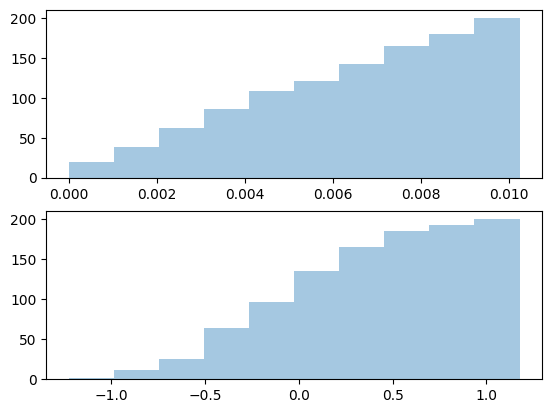

In [3]:
fig,axs=plt.subplots(2)
axs[0].hist(p,alpha=0.4,cumulative=True)
axs[1].hist(q,alpha=0.4,cumulative=True)

In [4]:
np.argmin(np.ones((3,2)),axis=0)

array([0, 0])

In [5]:
def emd(p,q):
    # make CDFs
    cp = np.cumsum(p)
    cq = np.cumsum(q)
    # calculate (symmetric - between both distributions) L1-distances
    dist_pq = abs(p[:,None] - q[None])
    dist_qp = abs(q[:,None] - p[None])
    return np.mean(np.min(dist_pq,axis=-1)) + np.mean(np.min(dist_qp,axis=-1))

In [6]:
emd(p,q)

0.3805831329067712

In [7]:
# compare with scipy's EMD
wasserstein_distance(p,q)

0.3815822538327775